This is the Melbourne Housing notebook 

In [187]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import numpy as np 
import pandas as pd 

import sklearn
import fastai

from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from DS_Utils import *


In [189]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [190]:
path = Path('data')
print(path/'test.csv')

data\test.csv


In [191]:
testdf = pd.read_csv(path/'test.csv', index_col='Id', parse_dates=True)
traindf = pd.read_csv(path/'train.csv', index_col='Id', parse_dates=True)

In [192]:
display_all(traindf.head().T)

Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [193]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [194]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

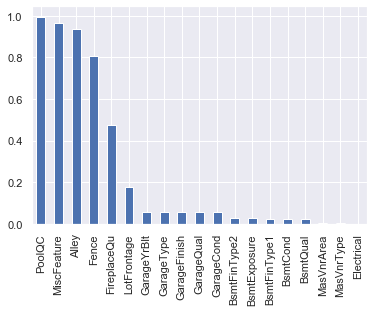

In [195]:
plotMissingValuesDF(traindf)

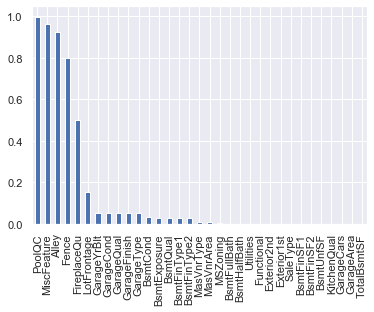

In [196]:
plotMissingValuesDF(testdf)

Ok. So PoolQC, MiscFeatures, Alley have a lot of missing values. So we are going to drop all the columns that have missing values above 80% missing values. 
If we read the data description, we see, that NA is corresponding to not there. So if we have a poolQC = NA, that basically means it has no pool. So therefore, we might want to think if we really want to drop those columns. 

It might not hurt to leave them in afterall.
 


In [197]:
# traindf_noMissing = dropColumnsAbovePercentage(traindf, 0.85)
# testdf_noMissing = dropColumnsAbovePercentage(testdf, 0.85)

In [221]:
cat_cols = traindf.select_dtypes('object').columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [222]:
dt_cols = traindf.select_dtypes('datetime').columns
dt_cols

Index([], dtype='object')

A closer look tells us, that there are no columns with datetime, as the format is basically only years. 

In [223]:
num_cols = traindf.select_dtypes(exclude = ['object','datetime']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MoSinceBuild', 'MoSinceRemodel',
       'HasBeenRemodelled', 'TotalPorchSF', 'TotalBaths', 'TotalAreaSF',
       'totalUnfinishedSF'],
      dtype='object')

# Feature Engineering:
Lets assume, that we are buying a house. What do we look for? For sure, how old it is. 
In specific it would be interesting when it was remodelled.
Also, when I look at a listing, I am interested in how much of anything it has. Baths, area, etc. 

Lets start with the times. We will create features, that will let us describe how much time passed between the construction and the purchase. 
We will choose months, as it captures the feeling at what time of the year that it has been purchased.


In [224]:
traindf[['YearBuilt','YearRemodAdd','MoSold','YrSold']].head(20)

,YearBuilt,YearRemodAdd,MoSold,YrSold
Id,,,,
1,2003,2003,2,2008
2,1976,1976,5,2007
3,2001,2002,9,2008
4,1915,1970,2,2006
5,2000,2000,12,2008
6,1993,1995,10,2009
7,2004,2005,8,2007
8,1973,1973,11,2009
9,1931,1950,4,2008


In [225]:
traindf['MoSinceBuild'] = (traindf.YrSold - traindf.YearBuilt)*12 + traindf.MoSold
traindf['MoSinceRemodel'] = (traindf.YrSold - traindf.YearRemodAdd)*12 + traindf.MoSold
traindf['HasBeenRemodelled'] = traindf.YearBuilt != traindf.YearRemodAdd

In [226]:
testdf['MoSinceBuild'] = (testdf.YrSold - testdf.YearBuilt)*12 + testdf.MoSold
testdf['MoSinceRemodel'] = (testdf.YrSold - testdf.YearRemodAdd)*12 + testdf.MoSold
testdf['HasBeenRemodelled'] = testdf.YearBuilt != testdf.YearRemodAdd

In [227]:
traindf[['MoSinceBuild','MoSinceRemodel','HasBeenRemodelled','MoSold','YrSold']].head(5)

,MoSinceBuild,MoSinceRemodel,HasBeenRemodelled,MoSold,YrSold
Id,,,,,
1,62,62,False,2,2008
2,377,377,False,5,2007
3,93,81,True,9,2008
4,1094,434,True,2,2006
5,108,108,False,12,2008


Ok. Now lets look at the other numerical columns

In [228]:
display_all(traindf[num_cols_train].head(20).T)

Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
MSSubClass,60.0,20.0,60.0,70.0,60.0,50.0,20.0,60.0,50.0,190.0,20.0,60.0,20.0,20.0,20.0,45.0,20.0,90.0,20.0,20.0
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,70.0,85.0,NaN,91.0,NaN,51.0,NaN,72.0,66.0,70.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0,14115.0,10084.0,10382.0,6120.0,7420.0,11200.0,11924.0,12968.0,10652.0,10920.0,6120.0,11241.0,10791.0,13695.0,7560.0
OverallQual,7.0,6.0,7.0,7.0,8.0,5.0,8.0,7.0,7.0,5.0,5.0,9.0,5.0,7.0,6.0,7.0,6.0,4.0,5.0,5.0
OverallCond,5.0,8.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,5.0,5.0,6.0,5.0,5.0,8.0,7.0,5.0,5.0,6.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0,1965.0,2005.0,1962.0,2006.0,1960.0,1929.0,1970.0,1967.0,2004.0,1958.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0,1995.0,2005.0,1973.0,1950.0,1950.0,1965.0,2006.0,1962.0,2007.0,1960.0,2001.0,1970.0,1967.0,2004.0,1965.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0,0.0,186.0,240.0,0.0,0.0,0.0,286.0,0.0,306.0,212.0,0.0,180.0,0.0,0.0,0.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0,906.0,998.0,737.0,0.0,733.0,0.0,578.0,0.0,646.0,504.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets add total bathrooms, total SF, total porch space. 


In [229]:
traindf['TotalPorchSF'] = traindf['3SsnPorch'] + traindf['EnclosedPorch'] + traindf['OpenPorchSF'] + traindf['WoodDeckSF'] + traindf['ScreenPorch']
testdf['TotalPorchSF'] = testdf['3SsnPorch'] + testdf['EnclosedPorch'] + testdf['OpenPorchSF'] + testdf['WoodDeckSF'] + testdf['ScreenPorch']


In [230]:
traindf['TotalBaths'] = traindf['HalfBath']*0.5 + traindf['FullBath'] + traindf['BsmtHalfBath']*0.5 + traindf['BsmtFullBath'] 
testdf['TotalBaths'] = testdf['HalfBath']*0.5 + testdf['FullBath'] + testdf['BsmtHalfBath']*0.5 + testdf['BsmtFullBath'] 

In [231]:
traindf['TotalAreaSF'] = traindf['TotalBsmtSF'] + traindf['GrLivArea']
testdf['TotalAreaSF'] = testdf['TotalBsmtSF'] + testdf['GrLivArea']

In [232]:
traindf['totalUnfinishedSF'] = traindf['LowQualFinSF'] +  traindf['BsmtUnfSF']
testdf['totalUnfinishedSF'] = testdf['LowQualFinSF'] +  testdf['BsmtUnfSF']


In [233]:
display_all(traindf.head(20).T)

Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60,20,20,20,45,20,90,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85,NaN,91,NaN,51,NaN,72,66,70
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924,12968,10652,10920,6120,11241,10791,13695,7560
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,Reg,IR1,IR2,IR1,IR1,Reg,IR1,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,Inside,Inside,Inside,Inside,Corner,Corner,CulDSac,Inside,Inside,Inside


## Lets save our dataframes to retrieve them later


In [234]:
path

WindowsPath('data')

In [235]:
traindf.to_csv(path/'traindf_notCleaned_FeatureEng1')
testdf.to_csv(path/'testdf_notCleaned_FeatureEng1')

# Data cleaning.... 

First we will try to clean the data with FastAI tabular module and check how good we come out. 

In [236]:
from fastai.tabular import * 

In [237]:
procs = [FillMissing, Categorify, Normalize]

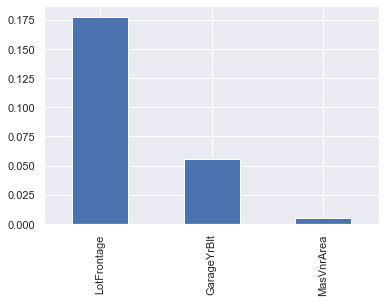

In [238]:
plotMissingValuesDF(traindf[num_cols])

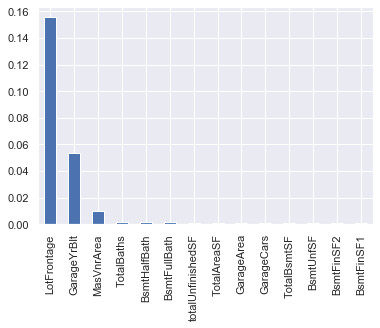

In [239]:
plotMissingValuesDF(testdf[num_cols.drop('SalePrice')])


<class 'pandas.core.indexes.base.Index'>


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')